In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


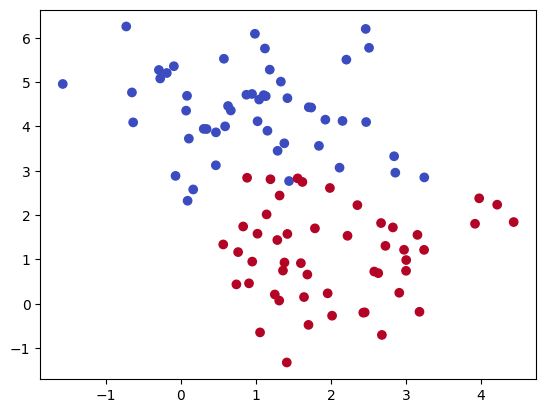

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()